<a href="https://colab.research.google.com/github/Ishan-Kotian/Tokenizer_NLP/blob/main/Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tokenization in NLP
Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


# Why is Tokenization required in NLP?
Before processing a natural language, we need to identify the words that constitute a string of characters. That’s why tokenization is the most basic step to proceed with NLP (text data). This is important because the meaning of the text could easily be interpreted by analyzing the words present in the text.

Let’s take an example. Consider the below string: “This is a cat.”

What do you think will happen after we perform tokenization on this string? We get [‘This’, ‘is’, ‘a’, cat’].

There are numerous uses of doing this. We can use this tokenized form to: Count the number of words in the text Count the frequency of the word, that is, the number of times a particular word is present And so on. We can extract a lot more information which we’ll discuss in detail in future articles. For now, it’s time to dive into the meat of this article – the different methods of performing tokenization in NLP.

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentence_list = [
                 "I Love machine learning",
                 "I love deep learning",
                 "We are learning deep learning"
]

In [3]:
tokenizer = Tokenizer(num_words = 50)
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

{'learning': 1, 'i': 2, 'love': 3, 'deep': 4, 'machine': 5, 'we': 6, 'are': 7}


In [5]:
sentence_list = [
                 "I Love machine learning",
                 "I love deep learning",
                 "We are learning deep learning",
                 "We are learning from best trainer"
]

tokenizer = Tokenizer(num_words = 50)
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentence_list)
for s in sequences : print(sequences)

{'learning': 1, 'i': 2, 'love': 3, 'deep': 4, 'we': 5, 'are': 6, 'machine': 7, 'from': 8, 'best': 9, 'trainer': 10}
[[2, 3, 7, 1], [2, 3, 4, 1], [5, 6, 1, 4, 1], [5, 6, 1, 8, 9, 10]]
[[2, 3, 7, 1], [2, 3, 4, 1], [5, 6, 1, 4, 1], [5, 6, 1, 8, 9, 10]]
[[2, 3, 7, 1], [2, 3, 4, 1], [5, 6, 1, 4, 1], [5, 6, 1, 8, 9, 10]]
[[2, 3, 7, 1], [2, 3, 4, 1], [5, 6, 1, 4, 1], [5, 6, 1, 8, 9, 10]]


In [6]:
new = ["The world is screwed, so are we"]
seq = tokenizer.texts_to_sequences(new)
print(seq)

[[6, 5]]


In [9]:
sentence_list = [
                 "I Love machine learning",
                 "I love deep learning",
                 "We are learning deep learning",
                 "We are learning from best trainer"
]

tokenizer = Tokenizer(num_words = 50,oov_token = "#OOv")
tokenizer.fit_on_texts(sentence_list)
word_index = tokenizer.word_index
print(word_index)

sequences = tokenizer.texts_to_sequences(sentence_list)
for s in sequences : print(s)


{'#OOv': 1, 'learning': 2, 'i': 3, 'love': 4, 'deep': 5, 'we': 6, 'are': 7, 'machine': 8, 'from': 9, 'best': 10, 'trainer': 11}
[3, 4, 8, 2]
[3, 4, 5, 2]
[6, 7, 2, 5, 2]
[6, 7, 2, 9, 10, 11]


In [11]:
new = ["The world is screwed, so are we"]
seq = tokenizer.texts_to_sequences(new)
print(s)

[6, 7, 2, 9, 10, 11]


In [12]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_seq = pad_sequences(sequences, padding = 'post')
for s in padded_seq : print(s)

[3 4 8 2 0 0]
[3 4 5 2 0 0]
[6 7 2 5 2 0]
[ 6  7  2  9 10 11]


# Training an RNN with IMDB dataset

In [13]:
import tensorflow_datasets as tfds
imdb, info = tfds.load("imdb_reviews", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJSRWNV/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJSRWNV/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0.incompleteJSRWNV/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [15]:
import numpy as np

train_data, test_data = imdb['train'], imdb['test']

training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(s.numpy().decode('utf8'))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(s.numpy().decode('utf8'))
  testing_labels.append(l.numpy())

training_labels_final = np.array(training_labels)
testing_labels_final = np.array(testing_labels)

In [16]:
count = 1
for s in training_sentences:
  if count>5 : break
  print(s,end = '\n\n\n')
  count +=1

This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.


I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot development was co

In [20]:
count = 1
for l in training_labels:
  if count>5 : break
  print(l,end = '\n\n')
  count +=1

0

0

0

1

1



In [21]:
print(len(training_sentences))
print(len(training_labels))

25000
25000


In [22]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
truc_type = 'post'
oov_token = "#OOV"

In [23]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [24]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
#print(sequences)
padded = pad_sequences(sequences,maxlen=max_length,truncating=truc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = max_length)

In [25]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim,input_length = max_length),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(16,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')

])

In [26]:
model.compile(loss = 'binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                12544     
_________________________________________________________________
dense (Dense)                (None, 16)                1040      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 173,601
Trainable params: 173,601
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(padded,training_labels_final,epochs = 6,validation_data = (testing_padded,testing_labels_final))

Epoch 1/6
782/782 [==============================] - 48s 19ms/step - loss: 0.5723 - accuracy: 0.6581 - val_loss: 0.3478 - val_accuracy: 0.8470
Epoch 2/6
782/782 [==============================] - 14s 17ms/step - loss: 0.2815 - accuracy: 0.8863 - val_loss: 0.3593 - val_accuracy: 0.8417
Epoch 3/6
782/782 [==============================] - 14s 17ms/step - loss: 0.2066 - accuracy: 0.9222 - val_loss: 0.3728 - val_accuracy: 0.8370
Epoch 4/6
782/782 [==============================] - 13s 17ms/step - loss: 0.1515 - accuracy: 0.9450 - val_loss: 0.5101 - val_accuracy: 0.8264
Epoch 5/6
782/782 [==============================] - 13s 17ms/step - loss: 0.0958 - accuracy: 0.9675 - val_loss: 0.5625 - val_accuracy: 0.8214
Epoch 6/6
782/782 [==============================] - 14s 18ms/step - loss: 0.0697 - accuracy: 0.9773 - val_loss: 0.6056 - val_accuracy: 0.8032


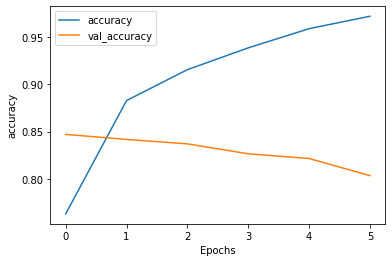

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epochs")
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

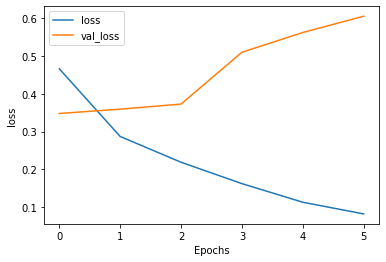

In [29]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()